<a href="https://colab.research.google.com/github/jtao22/PythonAI/blob/main/PricePrediction/NYCairbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#import 
import numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.preprocessing import LabelEncoder as LE
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.tree import DecisionTreeRegressor as dtr
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor as XGBR
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential as seq
from keras.layers import Dense, Flatten, Dropout
import math
from tensorflow.keras import layers
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
files.upload()

In [6]:
data = pd.read_csv('AB_NYC_2019.csv')
data = data.drop(columns=['host_name','id','name','host_id','last_review'], axis=1)
data.head(5)

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [7]:
data.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
data['reviews_per_month'] = data['reviews_per_month'].fillna(data['reviews_per_month'].mean(), inplace=False)
data.isnull().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
Y = data['price'].values
data = data.drop(columns=['price'], axis=1)
data['neighbourhood_group'] = LE().fit_transform(data['neighbourhood_group'])
data['neighbourhood'] = LE().fit_transform(data['neighbourhood'])
data['room_type'] = LE().fit_transform(data['room_type'])
scaler = MMS(feature_range=(0,1))
data = scaler.fit_transform(data)

In [10]:
trainX,testX,trainY,testY = tts(data,Y,test_size=0.2,random_state=42)

In [28]:
#create models
LR = lr()
LR.fit(trainX,trainY)

DTR = dtr()
DTR.fit(trainX,trainY)

xgbr = XGBR(n_estimators=1000, learning_rate=0.1, early_stopping=5, max_depth=5, min_child_weight=1)
xgbr.fit(trainX,trainY)


[02:39:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=5, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

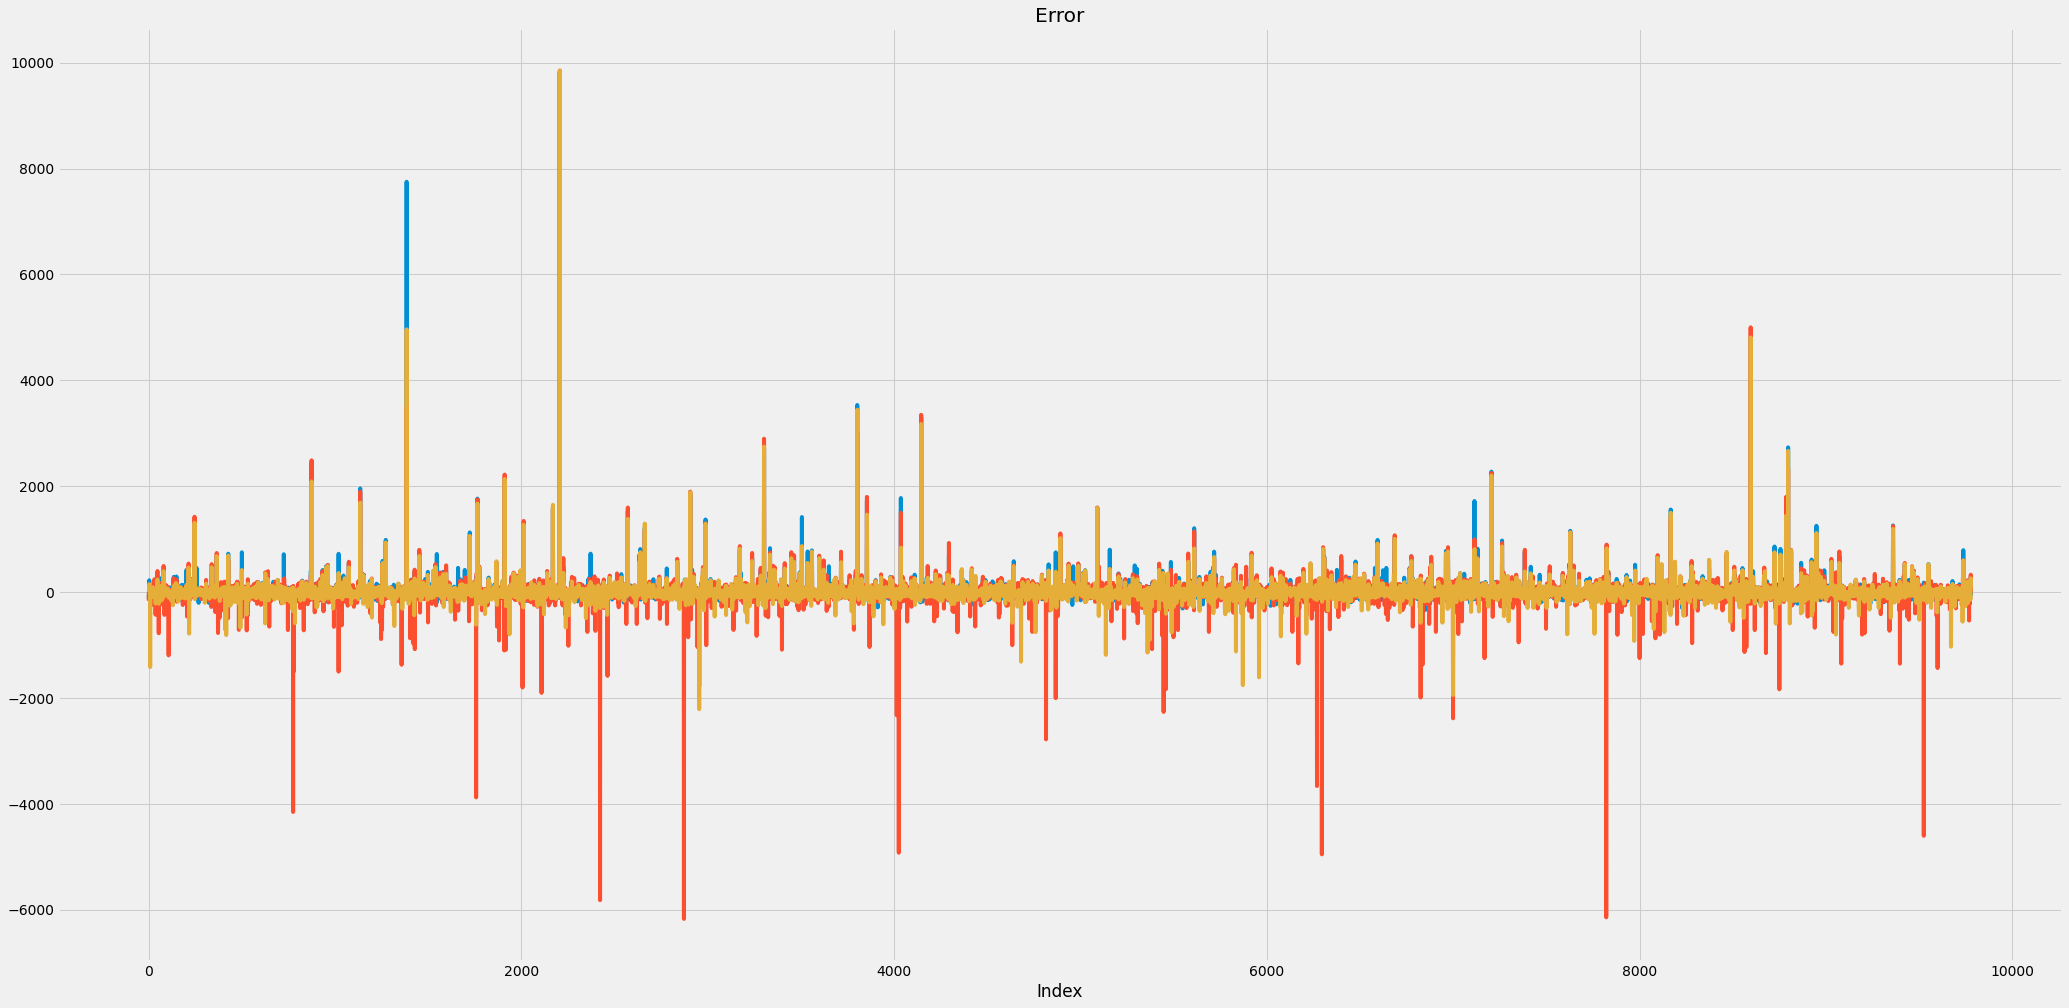

LR average error:  198.3205121728177
DTR average error:  265.2895939677109
XGBR average error:  192.19461865380876


In [36]:
plt.figure(figsize=(32,16))
plt.title('Error')
plt.xlabel('Index', fontsize=17)
plt.plot((testY-LR.predict(testX)))
plt.plot((testY-DTR.predict(testX)))
plt.plot(testY-xgbr.predict(testX))
plt.plot()
plt.show()
print("LR average error: ",math.sqrt(((testY-LR.predict(testX))**2).mean()))
print("DTR average error: ",math.sqrt(((testY-DTR.predict(testX))**2).mean()))
print("XGBR average error: ",math.sqrt(((testY-xgbr.predict(testX))**2).mean()))

####average error seems to be inflated by a couple of outliers in the test data.